Below are the steps of inplementation of the code of the algorithms

1. Reading Input from File
We will create a text file to store the process details, including:
Process ID (PID)
Arrival Time
Burst Time
2. Implement FCFS Scheduling
Implement the First-Come-First-Served (FCFS) algorithm that schedules processes based on their arrival order.
3. Implement SJF Scheduling
Implement the Shortest Job First (SJF) algorithm, selecting the process with the shortest burst time.
4. Implement Round Robin Scheduling
Implement the Round Robin (RR) algorithm with a time quantum, where each process gets an equal time slice.
5. Comparative Analysis
Compute the average waiting time and average turnaround time for each algorithm.
Use Matplotlib to plot the performance comparison.

In [1]:
from google.colab import files

# Upload the process_data.txt file
uploaded = files.upload()

# Read process data from the uploaded file
def read_process_data(file_name):
    processes = []
    with open(file_name, 'r') as file:
        for line in file:
            pid, arrival_time, burst_time = map(int, line.split())
            processes.append((pid, arrival_time, burst_time))
    return processes


Saving process_data.txt to process_data.txt


Saving process_data.txt to process_data.txt
Results for FCFS Scheduling:
PID	Arrival	Burst	Completion	Waiting	Turnaround
1	0	10	10		0		10
2	2	4	14		8		12
3	4	6	20		10		16
4	6	8	28		14		22


Results for SJF Scheduling:
PID	Arrival	Burst	Completion	Waiting	Turnaround
1	0	10	10		0		10
2	2	4	14		8		12
3	4	6	20		10		16
4	6	8	28		14		22


Results for Round Robin Scheduling:
PID	Arrival	Burst	Completion	Waiting	Turnaround
1	0	10	28		18		28
2	2	4	8		2		6
3	4	6	22		12		18
4	6	8	26		12		20




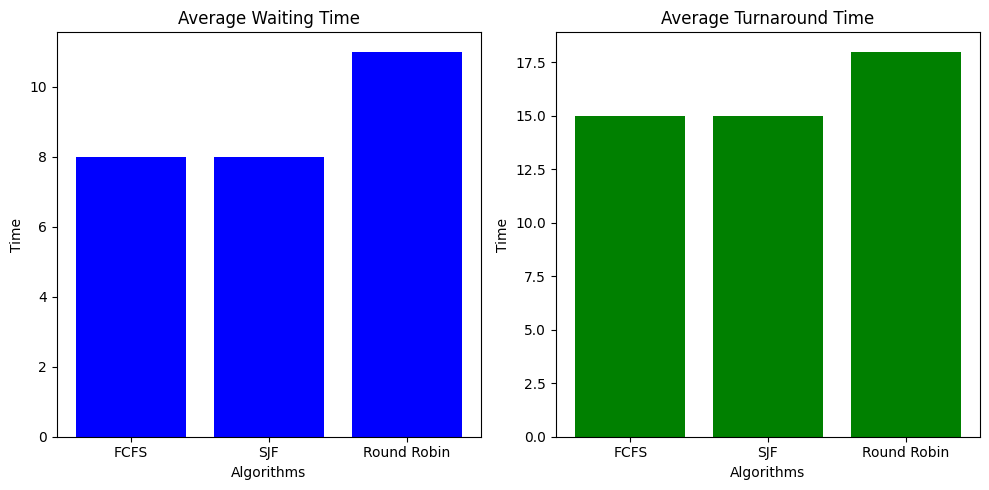

In [1]:
import matplotlib.pyplot as plt
from google.colab import files

# Upload the process_data.txt file
uploaded = files.upload()

# Read process data from the uploaded file
def read_process_data(file_name):
    processes = []
    with open(file_name, 'r') as file:
        for line in file:
            pid, arrival_time, burst_time = map(int, line.split())
            processes.append((pid, arrival_time, burst_time))
    return processes

# FCFS Scheduling
def fcfs_scheduling(processes):
    n = len(processes)
    processes.sort(key=lambda x: x[1])  # Sort by arrival time
    waiting_time = [0] * n
    turnaround_time = [0] * n
    completion_time = [0] * n

    current_time = 0
    for i in range(n):
        pid, arrival_time, burst_time = processes[i]
        if current_time < arrival_time:
            current_time = arrival_time
        completion_time[i] = current_time + burst_time
        current_time += burst_time
        turnaround_time[i] = completion_time[i] - arrival_time
        waiting_time[i] = turnaround_time[i] - burst_time

    return waiting_time, turnaround_time, completion_time

# Shortest Job First (Non-preemptive)
def sjf_scheduling(processes):
    n = len(processes)
    processes.sort(key=lambda x: x[1])  # Sort by arrival time
    remaining_processes = processes.copy()
    waiting_time = [0] * n
    turnaround_time = [0] * n
    completion_time = [0] * n
    current_time = 0

    while remaining_processes:
        available_processes = [p for p in remaining_processes if p[1] <= current_time]
        if not available_processes:
            current_time = remaining_processes[0][1]
            available_processes = [remaining_processes[0]]
        shortest_process = min(available_processes, key=lambda x: x[2])
        remaining_processes.remove(shortest_process)
        pid, arrival_time, burst_time = shortest_process
        completion_time[pid - 1] = current_time + burst_time
        turnaround_time[pid - 1] = completion_time[pid - 1] - arrival_time
        waiting_time[pid - 1] = turnaround_time[pid - 1] - burst_time
        current_time += burst_time

    return waiting_time, turnaround_time, completion_time

# Round Robin Scheduling
def round_robin_scheduling(processes, quantum):
    n = len(processes)
    remaining_time = [p[2] for p in processes]
    waiting_time = [0] * n
    turnaround_time = [0] * n
    completion_time = [0] * n
    time = 0
    done = False

    while not done:
        done = True
        for i, (pid, arrival_time, burst_time) in enumerate(processes):
            if remaining_time[i] > 0:
                done = False
                if remaining_time[i] > quantum:
                    time += quantum
                    remaining_time[i] -= quantum
                else:
                    time += remaining_time[i]
                    remaining_time[i] = 0
                    completion_time[pid - 1] = time
                    turnaround_time[pid - 1] = time - arrival_time
                    waiting_time[pid - 1] = turnaround_time[pid - 1] - burst_time

    return waiting_time, turnaround_time, completion_time

# Calculate and print average times
def calculate_average_times(waiting_time, turnaround_time):
    avg_waiting_time = sum(waiting_time) / len(waiting_time)
    avg_turnaround_time = sum(turnaround_time) / len(turnaround_time)
    return avg_waiting_time, avg_turnaround_time

# Print results
def print_results(processes, waiting_time, turnaround_time, completion_time, algo_name):
    print(f"Results for {algo_name} Scheduling:")
    print("PID\tArrival\tBurst\tCompletion\tWaiting\tTurnaround")
    for i, process in enumerate(processes):
        pid, arrival_time, burst_time = process
        print(f"{pid}\t{arrival_time}\t{burst_time}\t{completion_time[i]}\t\t{waiting_time[i]}\t\t{turnaround_time[i]}")
    print("\n")

# Visualization
def plot_comparison(fcfs_avg, sjf_avg, rr_avg):
    algorithms = ['FCFS', 'SJF', 'Round Robin']
    waiting_times = [fcfs_avg[0], sjf_avg[0], rr_avg[0]]
    turnaround_times = [fcfs_avg[1], sjf_avg[1], rr_avg[1]]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(algorithms, waiting_times, color='blue')
    plt.title('Average Waiting Time')
    plt.xlabel('Algorithms')
    plt.ylabel('Time')

    plt.subplot(1, 2, 2)
    plt.bar(algorithms, turnaround_times, color='green')
    plt.title('Average Turnaround Time')
    plt.xlabel('Algorithms')
    plt.ylabel('Time')

    plt.tight_layout()
    plt.show()

# Main execution
def main():
    file_name = list(uploaded.keys())[0]  # Use the uploaded file
    processes = read_process_data(file_name)

    # FCFS
    fcfs_waiting, fcfs_turnaround, fcfs_completion = fcfs_scheduling(processes)
    fcfs_avg = calculate_average_times(fcfs_waiting, fcfs_turnaround)
    print_results(processes, fcfs_waiting, fcfs_turnaround, fcfs_completion, "FCFS")

    # SJF
    sjf_waiting, sjf_turnaround, sjf_completion = sjf_scheduling(processes)
    sjf_avg = calculate_average_times(sjf_waiting, sjf_turnaround)
    print_results(processes, sjf_waiting, sjf_turnaround, sjf_completion, "SJF")

    # Round Robin
    time_quantum = 4  # Example quantum
    rr_waiting, rr_turnaround, rr_completion = round_robin_scheduling(processes, time_quantum)
    rr_avg = calculate_average_times(rr_waiting, rr_turnaround)
    print_results(processes, rr_waiting, rr_turnaround, rr_completion, "Round Robin")

    # Plot comparison
    plot_comparison(fcfs_avg, sjf_avg, rr_avg)

if __name__ == "__main__":
    main()
